In [1]:
"""
In this code we want to use what we've developed in the previous two, but this time apply it to a more substantial physical problem, namely
the merger of two galaxies. Of course, we're still using an overly simplified model of a 400-particle 'galaxy', but we'll still be able
to do some more data analysis, develop techniques and reach conclusions that only make sense in the context of galaxy collisions.
"""

"\nIn this code we want to use what we've developed in the previous two, but this time apply it to a more substantial physical problem, namely\nthe merger of two galaxies. Of course, we're still using an overly simplified model of a 400-particle 'galaxy', but we'll still be able\nto do some more data analysis, develop techniques and reach conclusions that only make sense in the context of galaxy collisions.\n"

Number of particles:  800


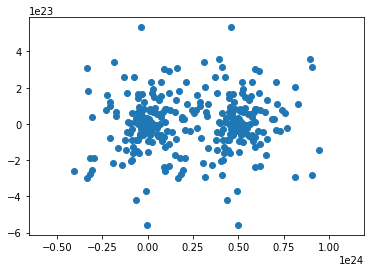

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

G = -6.67e-11         #Gravitational constant

#This function will make tick labels on graphs shorter and prettier
def custom_formatter(value, _):
    return "{:.2e}".format(value)

#-------------------------------------------------------------------------------------------

T = 86400*365*1e11   #Simulation end time in seconds, 1day = 86400s
t = 0                #Simulation start time, most commonly zero
dt = 86400*365*1e9   #Time step, smaller values give higher accuracy but longer computation time
soft = 1e6           #Softening length, where we'll disable force calculations to avoid the ~1/r divergence 

Minit, Xinit, Yinit, Zinit, VXinit, VYinit, VZinit = np.loadtxt('galaxy.txt', unpack=True)   #Initial conditions from file

"""
Minit = [6e24, 2e30]
Xinit = [1.5e11, 0]
Yinit = [0,0]
Zinit = [0,0]
VXinit = [0,0]
VYinit = [30000, 0]
VZinit = [0,0]
"""

Minit = np.concatenate((Minit, Minit))
Xinit = np.concatenate((Xinit, Xinit))
Yinit = np.concatenate((Yinit, Yinit))
Zinit = np.concatenate((Zinit, Zinit))
VXinit = np.concatenate((VXinit, VXinit))
VYinit = np.concatenate((VYinit, VYinit))
VZinit = np.concatenate((VZinit, VZinit))

#We will import the same galaxy twice, move one of them on the x-axis, and give them both additional velocity towards each other

N = len(Minit) #Twice the number of bodies in a single galaxy
print("Number of particles: ", N)

BAR = [] #List of True/False values depending on if the particle in question is baryonic or dark matter
MASSES = []
POS = np.zeros((N,3))
VEL = np.zeros((N,3))
for i in range(N):
    if i<400: #first galaxy
        MASSES.append(Minit[i]*2e30)
        POS[i] = [Xinit[i]*3.028e22,Yinit[i]*3.028e22,Zinit[i]*3.028e22]
        VEL[i] = [VXinit[i]*1e5 + 2.5e5,VYinit[i]*1e5,VZinit[i]*1e5] #additional x-direction velocity towards second galaxy

        if i<200:
            BAR.append(True)
        else:
            BAR.append(False)
        
    else: #second galaxy
        MASSES.append(Minit[i]*2e30)
        POS[i] = [Xinit[i]*3.028e22 + 0.5e24,Yinit[i]*3.028e22,Zinit[i]*3.028e22] #shifted second galaxy by 1e25m on x-axis
        VEL[i] = [VXinit[i]*1e5 - 2.5e5,VYinit[i]*1e5 + 1e5,VZinit[i]*1e5] #additional x-direction velocity towards first galaxy

        if i<600:
            BAR.append(True)
        else:
            BAR.append(False)


X = []
Y = []
Z = []
TIME = []        #List for storing time values
U = []           #List for the total potential energy over time
K = []           #List for the total kinetic energy over time
E = []           #List for the total energy over time
DELTA = []       #List for energy change over time

for i in range(N): #print initial positions of baryonic matter
    if BAR[i] == True:
        X.append(POS[i,0])
        Y.append(POS[i,1])
        Z.append(POS[i,2])


plt.scatter(X,Y)
plt.axis('equal')
plt.show()



0.0


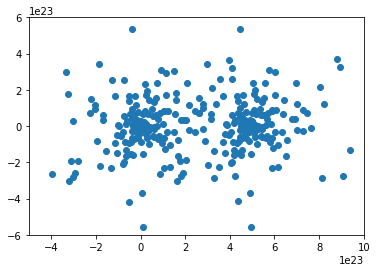

1.0


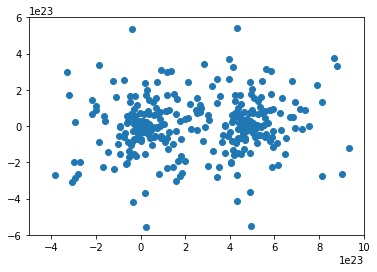

2.0


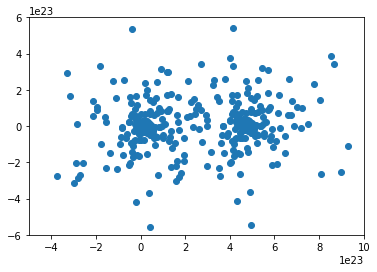

3.0


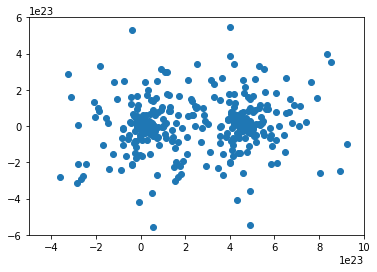

4.0


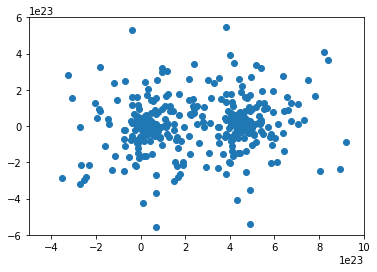

5.0


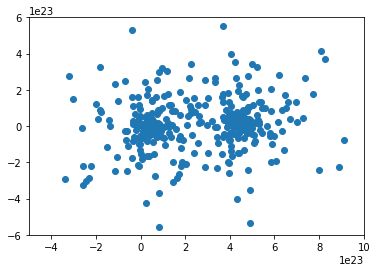

6.0


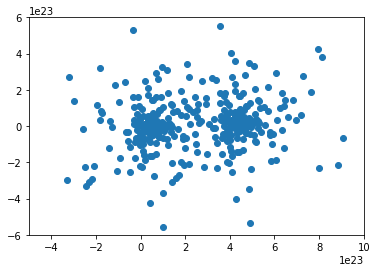

7.0


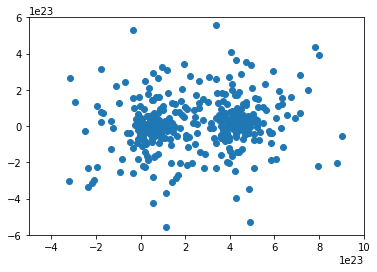

8.0


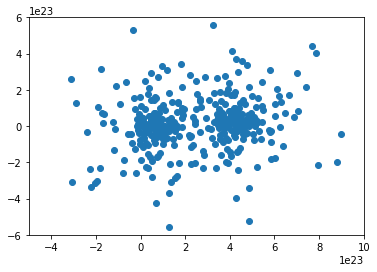

9.0


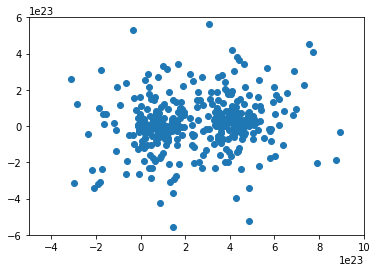

10.0


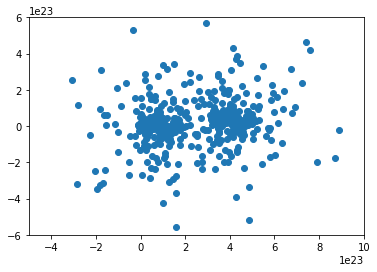

In [ ]:
#Clear coordinate lists for further plotting
X = []
Y = []
Z = []

def acc(pos, mass):
    ACCELERATIONS_local = np.zeros_like(pos)
    for i in range(len(pos)):
        for j in range(len(pos)):
            if i != j:
                r = pos[i] - pos[j]
                if np.linalg.norm(r)<=soft:
                    ACCELERATIONS_local[i] += G * mass[j] * r / np.linalg.norm(r)**3

    return ACCELERATIONS_local


k0 = 0 #Starting total kinetic energy of the system, to be calculated in the first timestep
u0 = 0 #-||- potential -||-
e0 = 0

while t<=T:

    X = []
    Y = []
    Z = []
    #RK4 step
    k1v = dt * acc(POS, MASSES)
    k1x = dt * VEL
    
    k2v = dt * acc(POS + k1x / 2, MASSES)
    k2x = dt * (VEL + k1v / 2)
    
    k3v = dt * acc(POS + k2x / 2, MASSES)
    k3x = dt * (VEL + k2v / 2)
    
    k4v = dt * acc(POS + k3x, MASSES)
    k4x = dt * (VEL + k3v)

    VEL += (k1v + 2*k2v + 2*k3v + k4v) / 6
    POS += (k1x + 2*k2x + 2*k3x + k4x) / 6


    print(t*100/T) #Real-time feed on how far the simulation has progressed, given in percentages
    t+=dt
    TIME.append(t)


    for i in range(N):
        if BAR[i] == True:
            X.append(POS[i,0])
            Y.append(POS[i,1])
            Z.append(POS[i,2])
    plt.scatter(X,Y)
    plt.xlim(-0.5e24, 1e24)
    plt.ylim(-6e23, 6e23)
    plt.show()